# ***Libraries For Project***

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

# ***Exploratary Data Analysis***

In [77]:
df = pd.read_csv(r"C:\Users\Sami Iftikhar\Desktop\Data Science\Datasets\BMW sales data.csv")

In [78]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [80]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [81]:
df.select_dtypes(["int", "float"]).corr()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
Year,1.000000,-0.001944,0.008741,0.003547,0.001671
Engine_Size_L,-0.001944,1.000000,-0.004906,0.000146,-0.003942
Mileage_KM,0.008741,-0.004906,1.000000,-0.004238,0.001434
Price_USD,0.003547,0.000146,-0.004238,1.000000,0.000080
Sales_Volume,0.001671,-0.003942,0.001434,0.000080,1.000000


# ***Visualize***

In [95]:
df.head(1)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High


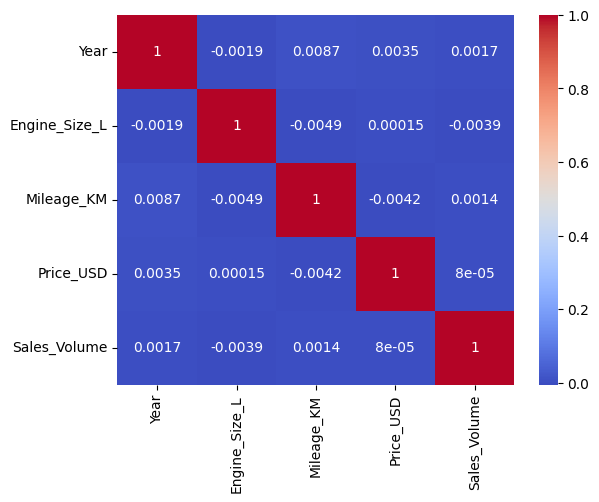

In [102]:
corr = df.select_dtypes(include=["int", "float"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# ***Train Test Split***

In [82]:
x = df.drop(["Sales_Classification"], axis=1)
y = df["Sales_Classification"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

# ***Column Transform***

### 1. Label Encoder

In [83]:
labelencoder = LabelEncoder()
ytrain = labelencoder.fit_transform(ytrain)
ytest = labelencoder.transform(ytest)

In [84]:
ytrain

array([0, 1, 1, ..., 1, 1, 1], shape=(40000,))

### 2. Ordinal Encoder

In [85]:
transform = ColumnTransformer(
    [("transform2", OrdinalEncoder(), [0,2,3,4,5])],
    remainder="passthrough"
)

# ***Model Predict***

### Random Forest Classifier Model

In [86]:
rfc = RandomForestClassifier()

# ***Pipeline***

In [87]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("Transform", transform),
    ("Transform 3", rfc)
])

In [88]:
pipeline.fit(xtrain, ytrain)

,steps,"[('Transform', ...), ('Transform 3', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('transform2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# ***Accuracy***

In [89]:
ypred = pipeline.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# ***Test***

In [90]:
def Predict(Model, Year, Region, Color, Fuel_Type, Transmission, Engine_Size_L, Mileage_KM, Sales_Volume):
    feature = [[Model, Year, Region, Color, Fuel_Type, Transmission, Engine_Size_L, Mileage_KM, Price_USD, Sales_Volume]]
    result = pipeline.predict(feature)
    if result == 0:
        return ("Sales Classification is High")
    else:
        return ("Sales Classification is Low")

In [93]:
df.head(1)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High


In [91]:
Model = input("Enter car Model: ")
Year = input("Enter Year: ")
Region = input("Enter Region: ")
Color = input("Enter car Color: ")
Fuel_Type = input("Enter car fuel type: ")
Transmission = input("Enter car Transmission: ")
Engine_Size_L = input("Enter car Engine Size: ")
Mileage_KM = input("Enter Mileage/km of car: ")
Price_USD = input("Enter Price of car: ")
Sales_Volume = input("Enter car Sales Volume: ")

Enter car Model:  5 Series
Enter Year:  2016
Enter Region:  Asia
Enter car Color:  Red
Enter car fuel type:  Petrol
Enter car Transmission:  Manual
Enter car Engine Size:  3.5
Enter Mileage/km of car:  151748
Enter Price of car:  98740
Enter car Sales Volume:  8300


In [92]:
Predict(Model, Year, Region, Color, Fuel_Type, Transmission, Engine_Size_L, Mileage_KM, Sales_Volume)

C:\Users\Sami Iftikhar\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


'Sales Classification is High'